# Figure 1, part 2

Removed splicing events in genes with TPM < 1 in Notebook `1.1 Supplementary Figure 1`.

In [2]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

# folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure1_expression'
folder = 'pdfs'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

2016-04-23 09:27:55	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-04-23 09:27:55	Parsing datapackage to create a Study object


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-04-23 09:28:49	Initializing Study
2016-04-23 09:28:49	Initializing Predictor configuration manager for Study
2016-04-23 09:28:49	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-04-23 09:28:49	Added ExtraTreesClassifier to default predictors
2016-04-23 09:28:49	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-04-23 09:28:49	Added ExtraTreesRegressor to default predictors
2016-04-23 09:28:49	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-04-23 09:28:49	Added GradientBoostingClassifier to default predictors
2016-04-23 09:28:49	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2016-04-23 09:28:49	Added GradientBoostingRegressor to default predictors
2016-04-23 09:28:54	Building Gene Ontology database...
2016-04-23 09:29:03		Done.
2016-04-

In [3]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [4]:
study.metadata._phenotype_to_color = {u'MN': u'#228a44',
                                     u'NPC': u'#73c476',
                                     u'iPSC': u'#c7e9c0'}

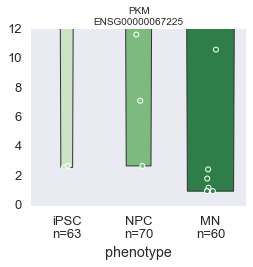

In [5]:
with sns.axes_style('dark'):
    study.plot_gene('PKM', sample_subset='~outlier')
    fig = plt.gcf()
    for ax in fig.axes:
        ax.set(ylim=(0, 12))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:178: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  self.magnitudes.sort(ascending=False)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:185: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  x.sort(ascending=True)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/decomposition.py:514: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  components = components.sort(columns='pc_1', ascending=False)
/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:1225: FutureWarning: slice indexers when using iloc should be integers and not floating point
  return self._getitem_tuple(key)


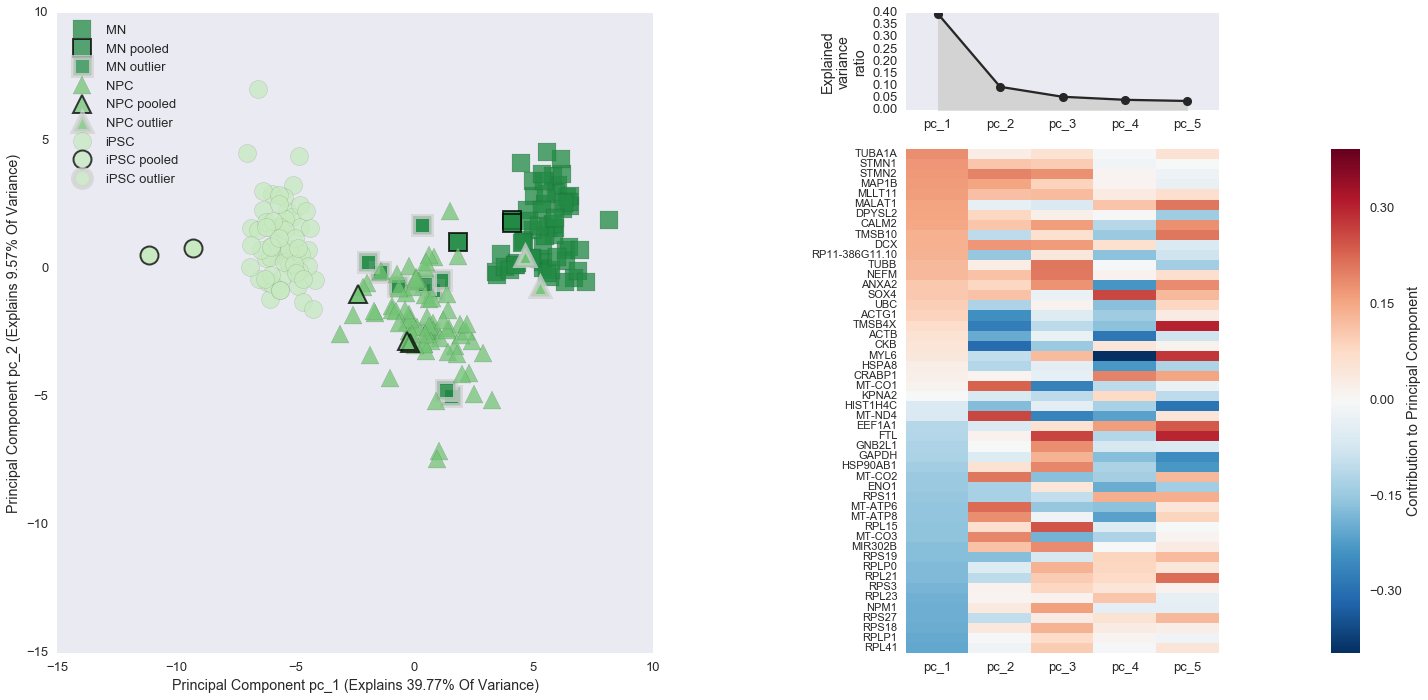

In [6]:
with sns.axes_style('dark'):
    viz = study.plot_pca(show_vectors=False, scale_by_variance=False, markersize=18)
    xmin, xmax, ymin, ymax = viz.ax_components.axis()
    vmin = min(xmin, ymin)
    vmax = max(xmax, ymax)
    viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
    viz.fig_reduced.savefig('{}/expression_pca.pdf'.format(folder))

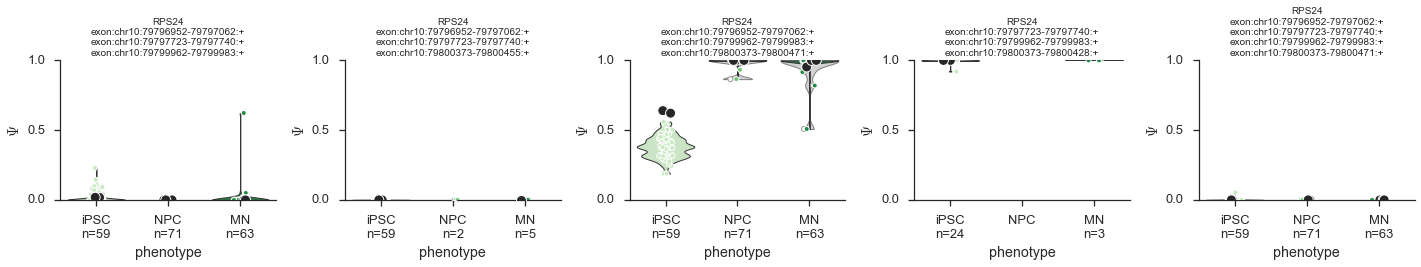

In [7]:
study.plot_event("RPS24")

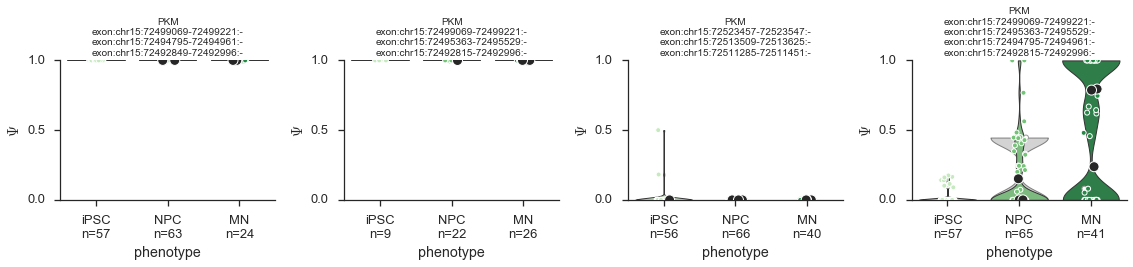

In [8]:
study.plot_event("PKM")

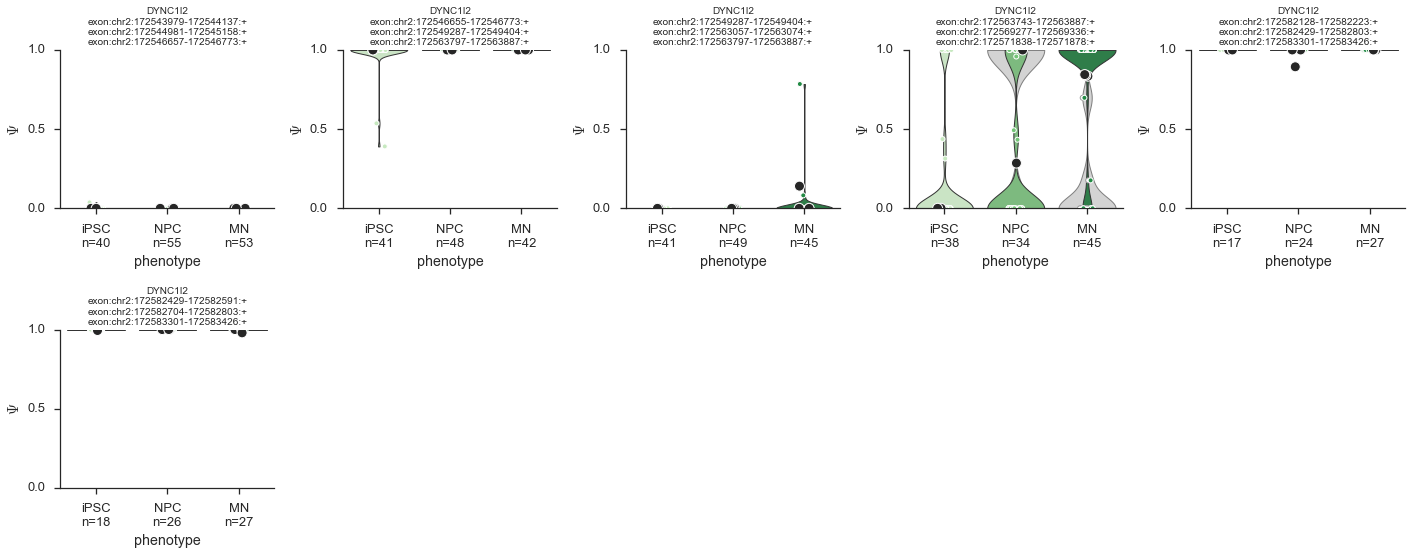

In [9]:
study.plot_event("DYNC1I2")

### Number of splicing events in non-differentially expressed genes

In [10]:
from flotilla.compute.expression import differential_expression


In [11]:
singles_not_outliers = study.expression.singles.loc[~study.expression.singles.index.isin(study.expression.outlier_samples)]
singles_not_outliers.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,767.114000,12.916510,1.000000,1.000000,6.721675,1,3.300000,1,1.000000,208.38101,...,3.421384,1.057492,1.223986,2.023710,1.057739,127.908810,1.112321,1.086377,1.000000,7.491240
CVN_02,40.467100,1.000000,1.000000,1.081765,1.000000,1,1.417855,1,2.735074,101.55300,...,20.020100,1.409577,1.000000,1.483182,1.000000,1.000000,1.000000,1.083834,1.062575,13.421780
CVN_03,1.106833,1.000000,2.398650,1.000000,1.000000,1,1.224092,1,1.000000,1.00000,...,1.169577,1.000000,1.000000,1.257156,1.200433,1.000000,1.000000,1.000000,1.000000,1.000000
CVN_04,343.142000,6.037272,1.000000,1.000000,103.150000,1,290.221300,1,2.227037,41.45520,...,3.130130,1.477311,1.000000,1.167390,1.102106,1.145061,1.000000,3.034340,1.153298,2.895840
CVN_05,185.010000,34.872500,1.199726,20.338940,1.317592,1,76.760700,1,1.530706,416.21884,...,1.866378,1.277275,1.000000,1.565478,1.197631,99.139160,1.000000,1.069501,1.096628,1.467557


In [12]:
differential_results = differential_expression(singles_not_outliers, groupby=study.sample_id_to_phenotype)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/compute/expression.py:234: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  de_results = de_results.sort('bonferonni_p_value')


In [13]:
differential_results.head()

,gene_id,U_statistic,p_value,bonferonni_p_value
0,ENSG00000234273,182.385219,2.486296e-40,3.985035e-36
1,ENSG00000258417,182.385219,2.486296e-40,3.985035e-36
2,ENSG00000249152,182.385219,2.486296e-40,3.985035e-36
3,ENSG00000130203,182.385219,2.486296e-40,3.985035e-36
4,ENSG00000167600,182.385219,2.486296e-40,3.985035e-36


In [14]:
differential_results['log10_bonferonni_p_value'] = -np.log10(differential_results.bonferonni_p_value)

In [15]:
log_p_cutoff = 5

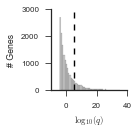

In [21]:
sns.set(style='ticks', context='paper')
fig, ax = plt.subplots(figsize=(2, 2))
# plt.yscale('log', nonposy='clip')

sns.distplot(differential_results['log10_bonferonni_p_value'], color='grey', kde=False)
ymin, ymax = ax.get_ylim()
ax.locator_params(nbins=4)

ax.vlines(log_p_cutoff, ymin, ymax, linestyle='--')
ax.set(ylabel='# Genes', xlabel='$\log_{10}(q)$')
sns.despine()

fig.tight_layout()
fig.savefig('{}/differential_expression_kruskal_wallis_bonferonni_p_value_cutoff.pdf'.format(folder))

In [18]:
non_de_genes = differential_results.gene_id.loc[differential_results.log10_bonferonni_p_value <= log_p_cutoff]
len(non_de_genes)

13059

### PCA of constitutively expressed genes

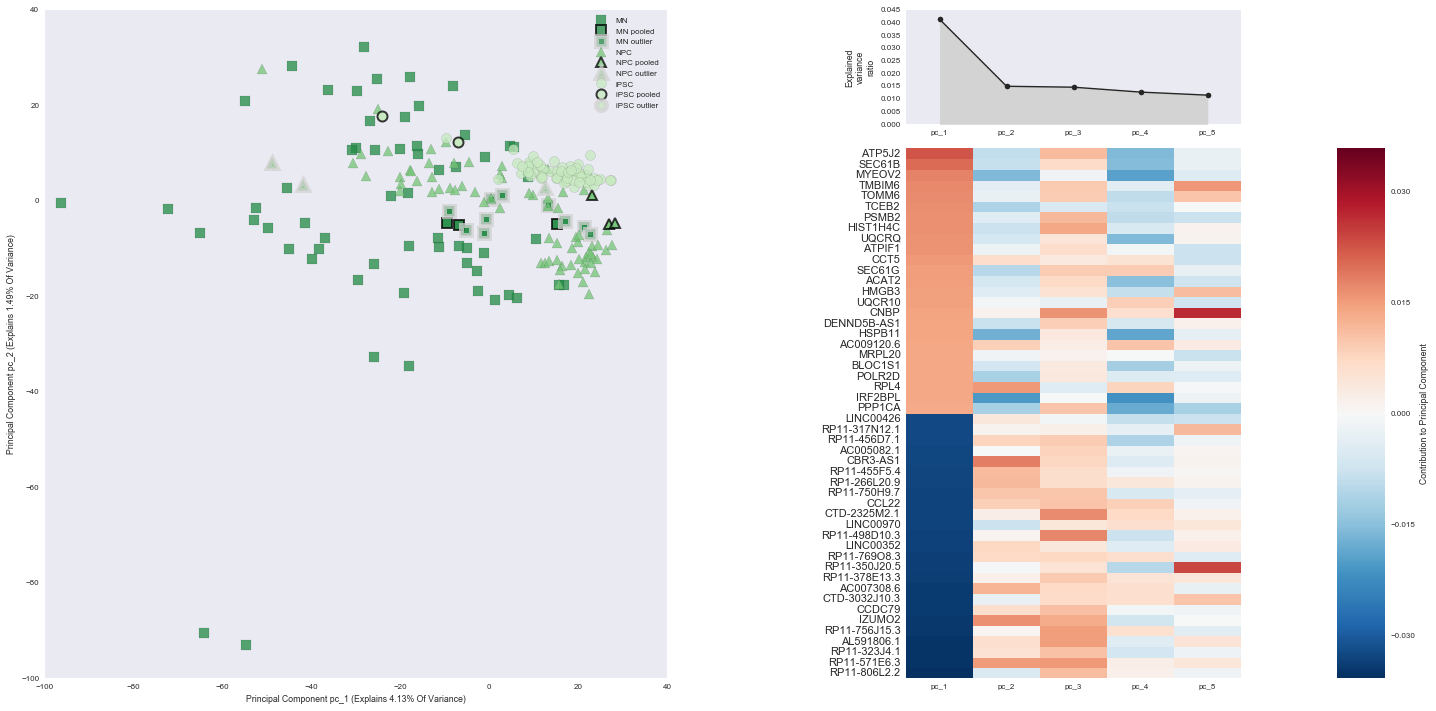

In [19]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False)
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_expression_pca.pdf'.format(folder))

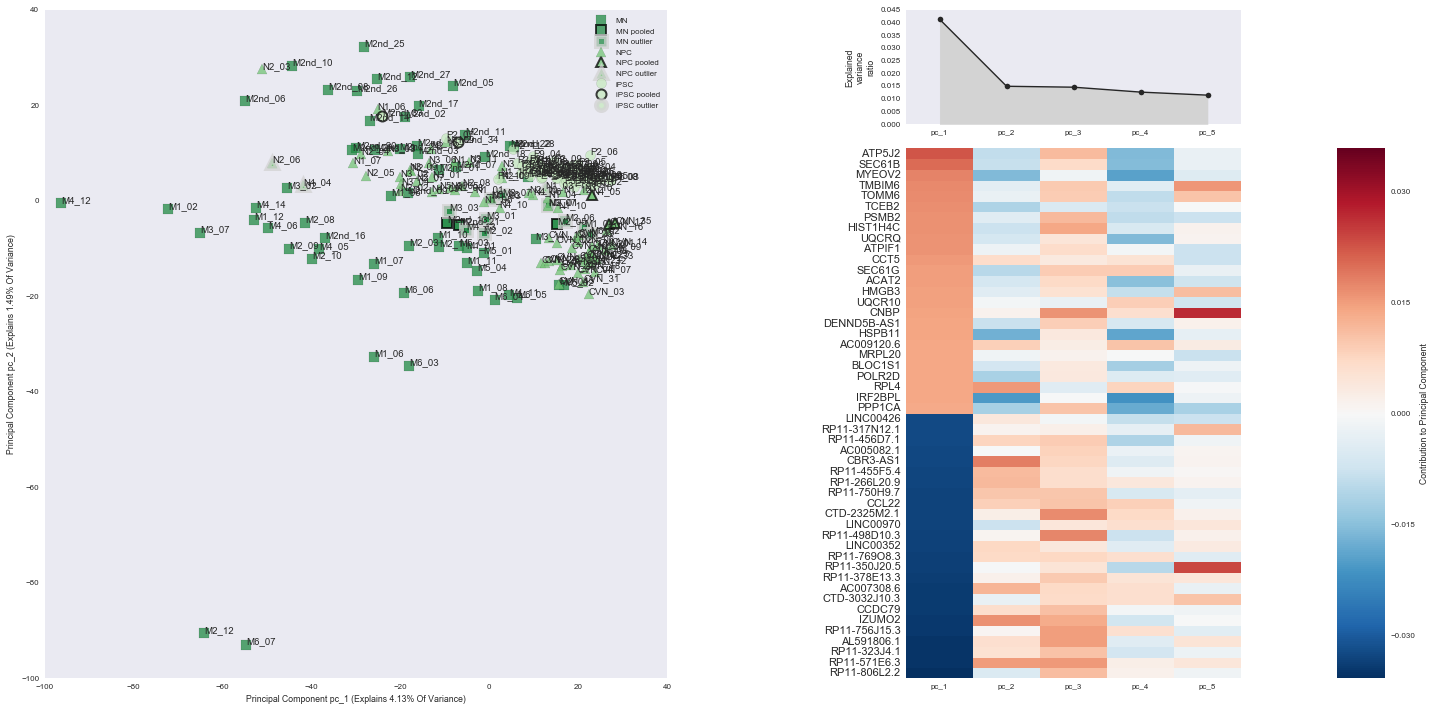

In [22]:
sns.set(style='dark', context='paper')
pcaviz = study.plot_pca(feature_subset=non_de_genes, show_vectors=False, show_point_labels=True)

`M2_12` and `M6_07` are the two motor neuron samples that always stick out

In [72]:
outlier_samples = ['M2_12', 'M6_07', 'M1_06', 'M6_03']

In [75]:
study.mapping_stats.data.loc[outlier_samples, 'Number of input reads']/1e6

M2_12     13.122227
M6_07     96.759045
M1_06     17.723146
M6_03    104.800138
Name: Number of input reads, dtype: float64

In [24]:
samples = ['M2_12', 'M6_07']
study.metadata.data['MN_outlier'] = False
study.metadata.data.loc[samples, 'MN_outlier'] = True

In [27]:
mn = study.sample_subset_to_sample_ids('MN')
mn_single = mn.intersection(study.expression.singles.index)
mn_single_not_outlier = mn.difference(study.expression.outliers.index)
len(mn_single_not_outlier)

63

In [28]:
mn_single_not_outlier.isin(samples)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True], dtype=bool)

In [29]:
study.plot_classifier('MN_outlier', sample_subset=mn_single_not_outlier)

TypeError: sequence item 0: expected string, Index found

In [30]:
study.plot_classifier??

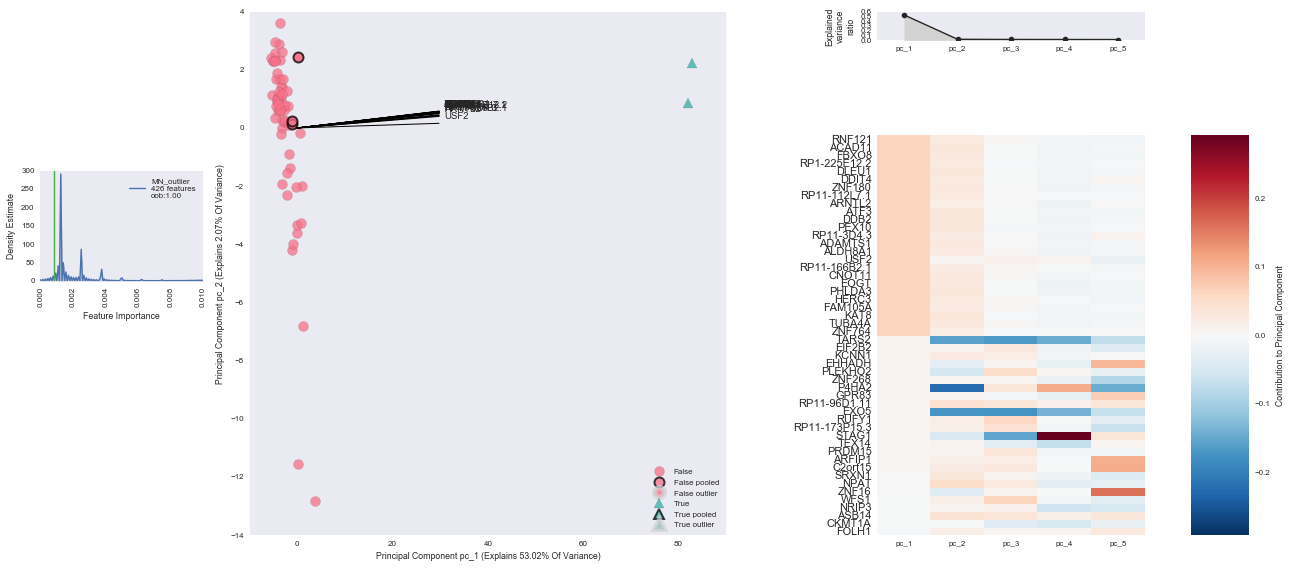

In [34]:
trait = 'MN_outlier'
trait_data = study.metadata.data[trait]
viz = study.expression.plot_classifier(trait_data, data_name='MN_outlier_all_genes', sample_ids=mn_single_not_outlier, 
                                 label_to_color=study.phenotype_to_color, groupby=study.sample_id_to_phenotype, 
                                 label_to_marker=study.phenotype_to_marker, order=study.phenotype_order)

In [49]:
important_features = viz.important_features_[viz.important_features_].index

In [50]:
from flotilla.compute.expression import differential_expression

In [54]:
data = study.expression.data.loc[mn_single_not_outlier, important_features]

In [55]:
from scipy import stats

In [56]:
statistical_test = stats.ttest_ind

In [58]:
groupby = trait_data

In [61]:

de_results = dict(
    (col, pd.Series(statistical_test(
        *[s for group, s in series.groupby(groupby)]),
        index=['statistic', 'p_value']))
    for col, series in data.iteritems())
de_results = pd.DataFrame.from_records(de_results).T
de_results['bonferonni_p_value'] = de_results.p_value*de_results.shape[0]
de_results = de_results.sort('bonferonni_p_value')
df = de_results.reset_index()
df = df.rename(columns={'index': 'gene_id'})

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [66]:
df['greater_than_zero'] = df['statistic'] > 0

In [67]:
df.loc[df['greater_than_zero']]

,gene_id,statistic,p_value,bonferonni_p_value,greater_than_zero
418,ENSG00000086205,0.233428,0.81621,347.705604,True
420,ENSG00000170631,0.221840,0.82518,351.526532,True


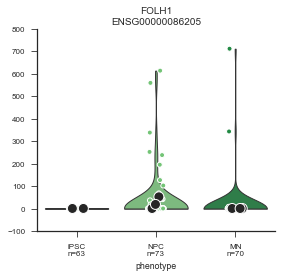

In [68]:
study.plot_gene('ENSG00000086205')

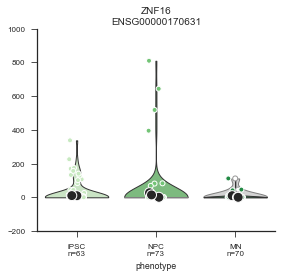

In [69]:
study.plot_gene("ENSG00000170631")

In [45]:
go = study.go_enrichment(foreground, viz.important_features_.index, min_feature_size=5, min_background_size=10)
go.head()

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0035023,"ENSG00000104880,ENSG00000180263,ENSG0000015340...","ARHGEF18,FGD6,PLEKHG4B,CTD-2207O23.3,ARHGEF26,...",biological_process,regulation of Rho protein signal transduction,55,6,81,0.000602,0.072816
GO:0005089,"ENSG00000104880,ENSG00000180263,ENSG0000015340...","ARHGEF18,FGD6,PLEKHG4B,CTD-2207O23.3,ARHGEF26,...",molecular_function,Rho guanyl-nucleotide exchange factor activity,56,6,76,0.000672,0.081347
GO:0005085,"ENSG00000104880,ENSG00000083520,ENSG0000018026...","ARHGEF18,DIS3,FGD6,EIF2B2,RALGPS1,DOCK8,FGD4",molecular_function,guanyl-nucleotide exchange factor activity,77,7,101,0.000988,0.119531
GO:0006811,"ENSG00000074621,ENSG00000186297,ENSG0000016800...","SLC24A1,GABRA5,SLC3A2,SLC7A11,SLC24A5,SLC9A8,S...",biological_process,ion transport,137,9,307,0.003622,0.438226
GO:0005543,"ENSG00000104880,ENSG00000174307,ENSG0000018026...","ARHGEF18,PHLDA3,FGD6,PLEKHH1,PLEKHG4B,SYT14,CT...",molecular_function,phospholipid binding,234,13,366,0.004046,0.489571


In [47]:
arghef18_ensembl = study.expression.maybe_renamed_to_feature_id('ARHGEF18')[0]
arghef18_ensembl

'ENSG00000104880'

In [48]:
study.expression.data.loc[mn_single_not_outlier, arghef18_ensembl]

M1_01        1.000000
M1_02        1.000000
M1_05        1.000000
M1_06        3.453080
M1_07      139.066920
M1_08        1.364049
M1_09        8.200948
M1_10        1.000000
M1_11        1.000000
M1_12        1.000000
M2_03        1.000000
M2_04        1.000000
M2_05        3.123772
M2_08        1.083030
M2_09        1.000000
M2_10       75.396500
M2_11       17.520700
M2_12      282.207410
M2nd_01      1.000000
M2nd_02      1.000000
M2nd_03      1.000000
M2nd_04      1.000000
M2nd_05      1.000000
M2nd_06      1.000000
M2nd_07      1.000000
M2nd_08      1.000000
M2nd_09      1.988696
M2nd_10      1.000000
M2nd_11      1.000000
M2nd_12      1.000000
              ...    
M2nd_16      1.000000
M2nd_17      1.000000
M2nd_18      1.000000
M2nd_19    499.716000
M2nd_20      1.000000
M2nd_21      1.000000
M2nd_22      1.000000
M2nd_24      1.000000
M2nd_25      1.000000
M2nd_26      1.000000
M2nd_27      1.000000
M2nd_28      1.000000
M2nd_29      1.000000
M3_02        1.000000
M3_07     

In [23]:
study.expression.data.loc[['M2_12', 'M6_07']]

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
M2_12,395.768,41.50720,22.53435,3.96732,1.891878,1,7.45138,1,1.333320,352.044962,...,8.28173,8.16219,1,2.937898,1.615615,1.966411,1.676622,3.16596,4.11657,10.19068
M6_07,383.687,45.77075,23.26793,4.27739,1.600575,1,7.56816,1,1.153312,302.751628,...,6.88570,6.20519,1,2.719650,1.480532,1.711062,1.593234,2.56690,3.52374,12.98870


### PCA of constitutively expressed splicing events

### Get the splicing events

In [43]:
non_de_event_names = study.splicing.expression_to_splicing_id(non_de_genes)

### Plot PCA

In [77]:
study.metadata.data.columns

Index([u'single', u'pooled', u'phenotype', u'neuron', u'progenitor',
       u'stressed', u'craig_venter', u'differentiation_batch', u'split',
       u'outlier', u'MN_outlier'],
      dtype='object')

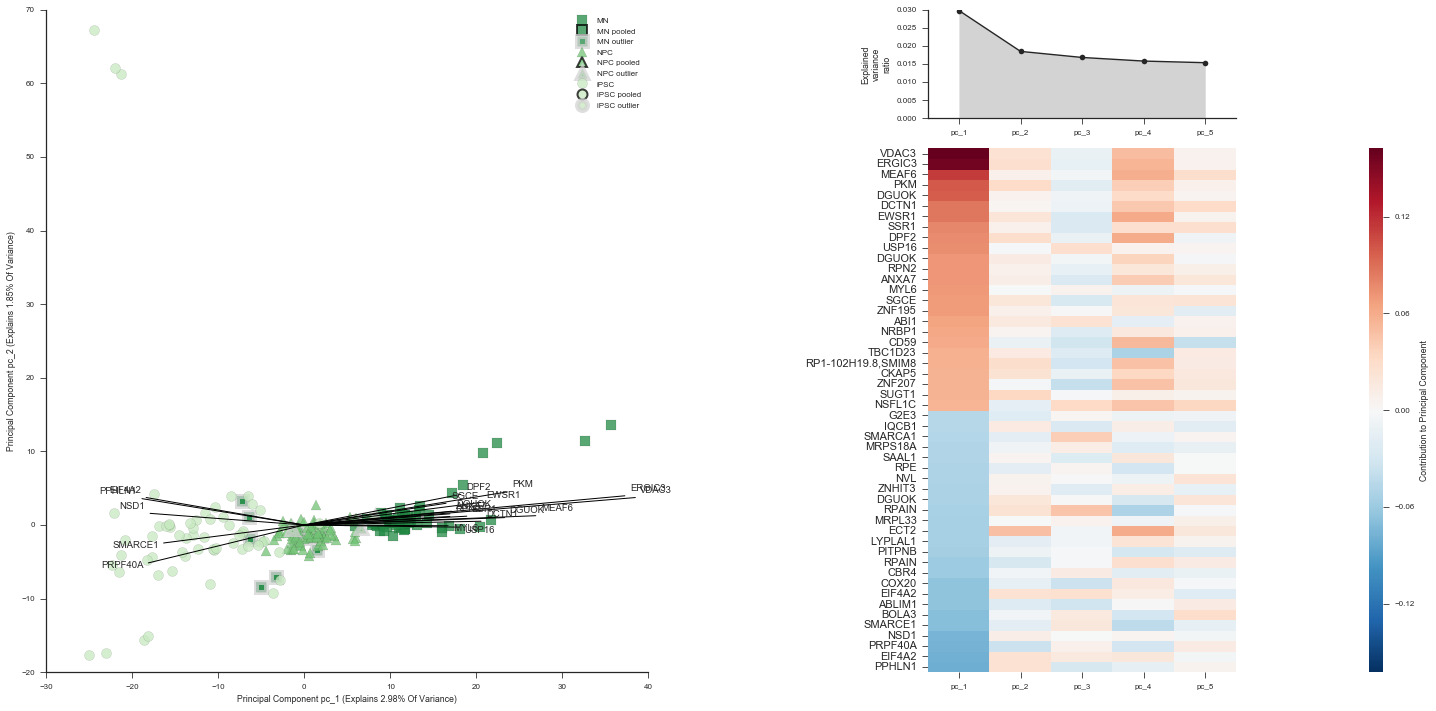

In [78]:
sns.set(style='ticks', context='paper')
study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', sample_subset='~pooled')
pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_splicing_pca.pdf'.format(folder))

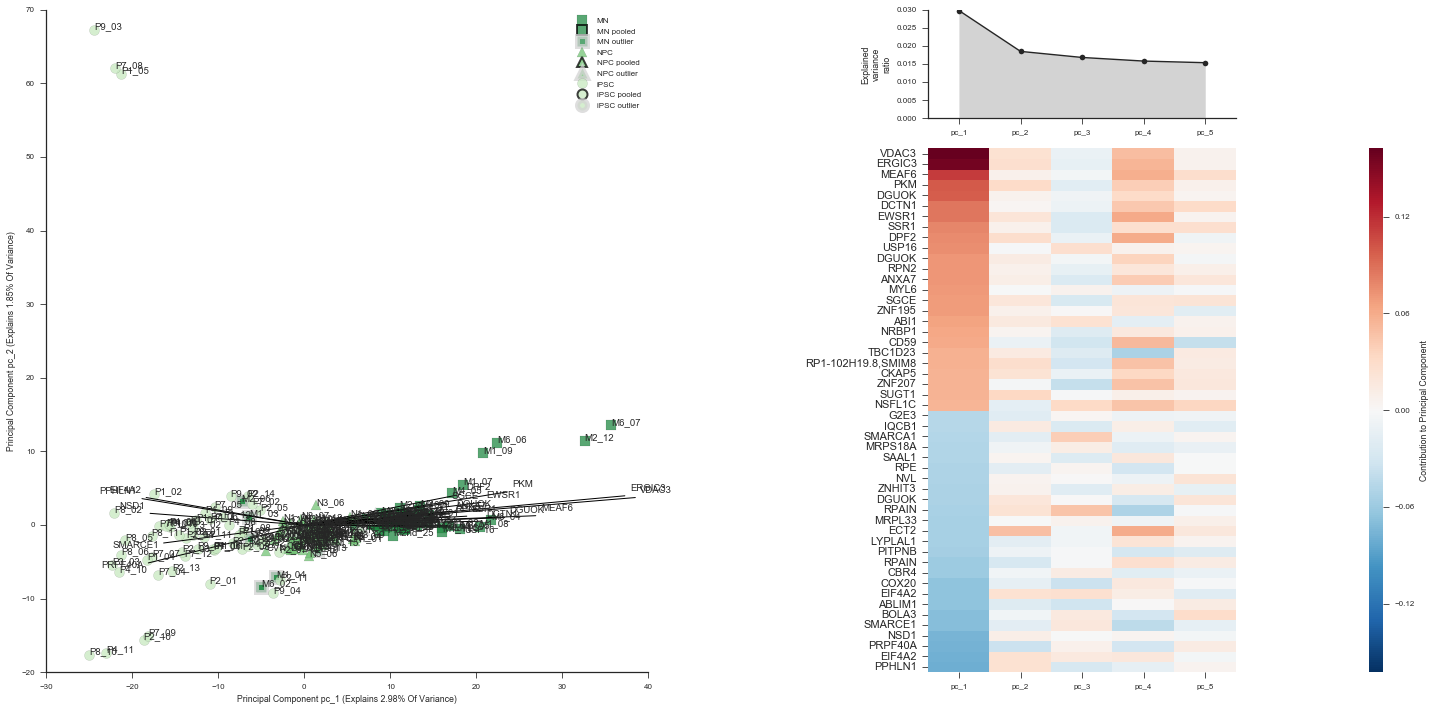

In [79]:
sns.set(style='ticks', context='paper')
study.plot_pca(feature_subset=non_de_event_names, data_type='splicing', sample_subset='~pooled', show_point_labels=True)
# pcaviz.fig_reduced.savefig('{}/constitutively_expressed_genes_splicing_pca.pdf'.format(folder))

In [82]:
ips_splicing_outliers = ['P9_03', 'P7_08', 'P1_05', 'P4_11', 'P8_10', 'P2_10', 'P7_09']
study.mapping_stats.data.loc[ips_splicing_outliers, 'Number of input reads']/1e6

P9_03    55.873523
P7_08    12.667408
P1_05    10.622759
P4_11     9.417308
P8_10    29.241199
P2_10    25.536453
P7_09    26.286302
Name: Number of input reads, dtype: float64

In [ ]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[non_de_event_names].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = pd.Index(non_de_genes).difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Constitutively\nexpressed genes')
fig.tight_layout()
fig.savefig('{}/constitutively_expressed_genes_percentage_genes_with_events.pdf'.format(folder))


### Number of splicing events in all expressed genes

In [ ]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.splicing.data.columns].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = study.expression.data.columns.difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Expressed genes')
fig.tight_layout()
fig.savefig('{}/percentage_genes_with_events.pdf'.format(folder))


In [ ]:
sns.set(style='ticks', context='paper')

In [ ]:
tf_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_tf']].dropna()
rbp_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_rbp_target_mrna']].dropna()
lincrna_events = event_per_genes[study.expression.feature_subsets['transcript_type: lincRNA']].dropna()

all_genes_events = event_per_genes.reset_index()
all_genes_events['Gene Type'] = 'All genes'

tf_events = tf_events.reset_index()
tf_events['Gene Type'] = 'TF'

rbp_events = rbp_events.reset_index()
rbp_events['Gene Type'] = 'RBP'

lincrna_events = lincrna_events.reset_index()
lincrna_events['Gene Type'] = 'lincRNA'

events_per_gene_type = pd.concat([all_genes_events, tf_events, rbp_events, lincrna_events])
events_per_gene_type = events_per_gene_type.rename(columns={0:'AS exons per gene'})

fig, ax = plt.subplots(figsize=(2.25, 2))
sns.boxplot(x='Gene Type', y='AS exons per gene', data=events_per_gene_type, linewidth=1, color='grey')
sns.despine()
ax.locator_params('y', nbins=5)
# ax.set_ylim(0, 100)

from scipy.stats import mannwhitneyu
import itertools

grouped = events_per_gene_type.groupby('Gene Type')
groups = grouped.groups.keys()

comparisons = itertools.combinations(groups, 2)

col = 'AS exons per gene'

results = []
for group1, group2 in comparisons:
    test_statistic, p_value = mannwhitneyu(grouped.get_group(group1)[col], grouped.get_group(group2)[col])
    results.append([group1, group2, test_statistic, p_value])

columns = ['group1', 'group2', 'test_statistic', 'p_value']

mannwhitney_results = pd.DataFrame(results, columns=columns)
mannwhitney_results = mannwhitney_results.set_index(['group2', 'group1']).sort_index()
print mannwhitney_results.sort('p_value')
# ## Know that RBP-everything else is significant, so plot those
# others = ('All genes', 'TF', 'lincRNA')
# xticklabels = [x.get_text() for x in ax.get_xticklabels()]
# rbp_i = xticklabels.index('RBP')

# ymax = grouped[col].max().max()

# offset = 0
# yrange = ymax - grouped[col].min().min()
# offset_interval = yrange*0.1
# for i, other in enumerate(others):
#     offset = offset_interval*(i+1)
#     other_i = xticklabels.index(other)
#     ax.annotate("", xy=(rbp_i, ymax+offset), xycoords='data',
#                xytext=(other_i, ymax+offset), textcoords='data',
#                arrowprops=dict(arrowstyle="-", ec='#444444',
#                                connectionstyle="bar,fraction=0.08"))
#     middle = abs((rbp_i + other_i)/2.)
#     ax.text(middle, ymax + offset, '***',
#            horizontalalignment='center',
#            verticalalignment='center', fontsize=16)
# ax.set(xlabel='*** $p<10^{-10}$')
fig.tight_layout()
fig.savefig('{}/splicing_events_per_gene.pdf'.format(folder))

## Venn Diagram of shared events

In [56]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh=20, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicing20.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\n20+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_splicing/shared_events_venn_20_per_phenotype.pdf')

NameError: name 'splicing20' is not defined

## Lavalamp plots

In [ ]:
study.splicing.data.shape

In [ ]:
singles_no_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
len(singles_no_outliers)

In [ ]:
splicing_singles = study.splicing.data.loc[singles_no_outliers]
splicing_singles_count = splicing_singles.groupby(study.sample_id_to_phenotype).count()
twenty_per_celltype = (splicing_singles_count >= 20).any(axis=0)
splicing20 = study.splicing.data[twenty_per_celltype[twenty_per_celltype].index]
print splicing20.shape

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
fig, ax = plt.subplots(figsize=(2, 2))
plt.xscale('log', nonposx='clip')
sns.distplot(splicing20.values.flat, bins=np.linspace(0, 1, 20), color='grey', kde=False, vertical=True)
ax.set(yticks=(0, 0.5, 1), ylabel='$\Psi$', xlabel='AS Exons')
sns.despine()
fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_distplot.pdf'.format(folder))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2))
flotilla.visualize.splicing.lavalamp(splicing20, color='grey', ax=ax)
# fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_lavalamp_all.png'.format(folder))

In [ ]:
fig, (ax_lavalamp, ax_hist) = plt.subplots(ncols=2, figsize=(3.75, 1), sharey=True,
                                           gridspec_kw=dict(width_ratios=(0.8, 0.2), wspace=0.05))

flotilla.visualize.splicing.lavalamp(splicing20, color='grey', ax=ax_lavalamp)

# Set the histogram axes as the current axes
plt.sca(ax_hist)
plt.xscale('log', nonposx='clip')
sns.distplot(splicing20.values.flat, bins=np.linspace(0, 1, 10), color='grey', 
             kde=False, vertical=True, ax=ax_hist)
# ax_hist.set(yticks=[], ylabel='', xlabel='')
sns.despine()
# fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_distplot_lavalamp.pdf'.format(folder), dpi=72)

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh=20, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicing20.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\n20+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_splicing/shared_events_venn_20_per_phenotype.pdf')